<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Random-Forest-Regression" data-toc-modified-id="Random-Forest-Regression-1">Random Forest Regression</a></span><ul class="toc-item"><li><span><a href="#Wstęp" data-toc-modified-id="Wstęp-1.1">Wstęp</a></span></li><li><span><a href="#Teraz-czas-na-Ciebie-:)" data-toc-modified-id="Teraz-czas-na-Ciebie-:)-1.2">Teraz czas na Ciebie :)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Zadanie-z-*" data-toc-modified-id="Zadanie-z-*-1.2.0.1">Zadanie z *</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Random Forest Regression

In [1]:
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor

from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_boston

## Wstęp

Przeprowadź rozumowanie dla problemu regresji. Użyj w tym celu omawianego **sklearn.ensemble.RandomForestRegressor**.

* Wczytaj zaproponowany zbiór danych dotyczący cen mieszkań w Bostonie. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

I spróbuj przewidzieć ceny mieszkań na podstawie dostępnych zmiennych.

In [2]:
boston = load_boston()
all_x, all_y = boston.data, boston.target

C:\Users\karol\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

* Stwórz obiekt RandomForestRegressor z domyślnymi parametrami i dopasuj go do danych (metoda .fit()).

In [4]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(all_x, all_y)

RandomForestRegressor()

In [8]:
?RandomForestRegressor

* Sprawdźmy wynik na zbiorze uczącym używając metody .score().

Metoda ta zwraca domyślnie dla RandomForestRegressor wartość współczynnika determinacji R^2.

In [6]:
rf_regressor.score(all_x, all_y)

0.9832779293695765

In [9]:
?rf_regressor.score

* Możesz użyć metody .predict() żeby zwrócić predykcje. [:5] - ogranicza do pierwszych pięciu wyników

In [10]:
all_x[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [11]:
rf_regressor.predict(all_x[:5])

array([25.206, 21.703, 34.831, 34.   , 35.398])

## Teraz czas na Ciebie :)

Przeprowadź analizę danych:

In [15]:
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df['TARGET'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Podziel zbiór na treningowy i testowy w proporcji 2:1.

In [16]:
train_x, test_x, train_y, test_y = train_test_split(all_x, all_y, test_size=1/3, random_state=42)

Stwórz nowy Forest Regressor z domyślnymi parametrami i dopasuj go do zbioru treningowego.

In [17]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(train_x, train_y)

cross_val_score(rf_regressor, train_x, train_y, cv=5).mean()

0.8127912991730956

Narysuj jedno drzewo tworzące powyższy las losowy, użyj atrybutu .estimators_[2] oraz funkcji plot_tree.

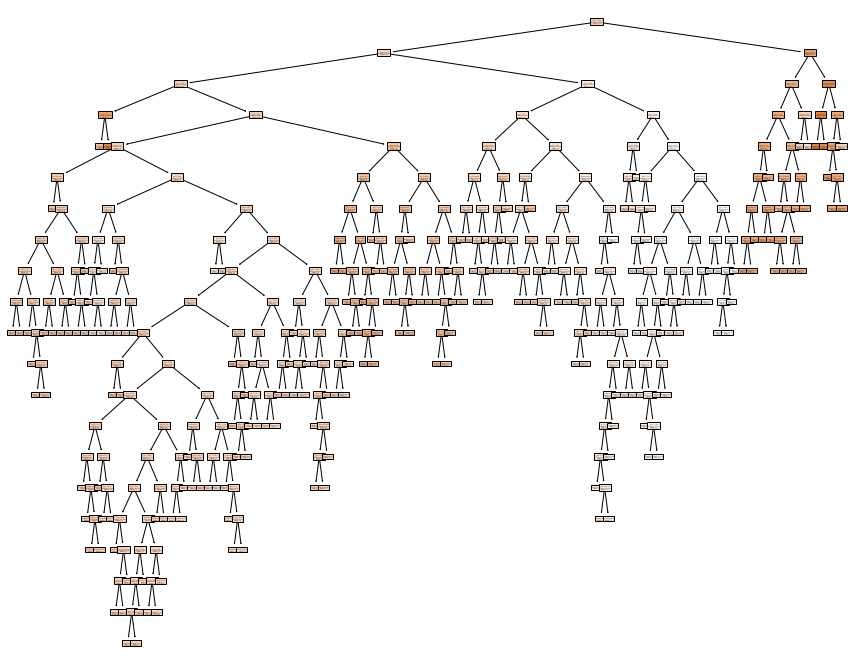

In [18]:
plt.figure(figsize = (15,12))

plot_tree(
    rf_regressor.estimators_[1],
    filled=True,
         );

In [20]:
rf_regressor.score(train_x, train_y) # na train R^2

0.9798986402236595

Sprawdz score na danych testowych.

In [19]:
rf_regressor.score(test_x, test_y) # na test R^2

0.8706442441022426

* Sprawdz jak zmienia się score gdy liczba estymatorów zmienia się od 1 do 100 (parametr n_estimators).

Narysuj wykres zależności wyniku od wartości parametru. Jakie masz wnioski?

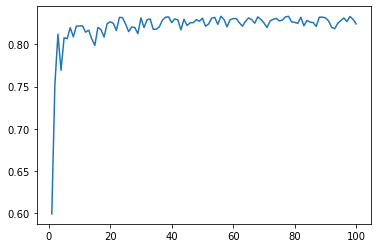

In [21]:
results = []
estimators = range(1, 101)
for param in estimators:
    rf_regressor = RandomForestRegressor(n_estimators=param)
    score = cross_val_score(rf_regressor, train_x, train_y, cv=10).mean()
    results.append(score)
plt.plot(estimators, results)

Dla wartości n_estimators od ok. 20 metryka nie rośnie. 

* Dopasuj model Random Forest z 80 estymatorami (parametr n_estimators).

Narysuj jak współczynnik R^2 zmienia się ze zmianą parametru `max_leaf_nodes` dla zbioru treningowego i testowego.

Użyj zakresu wartości: `range(2, 500, 10)`

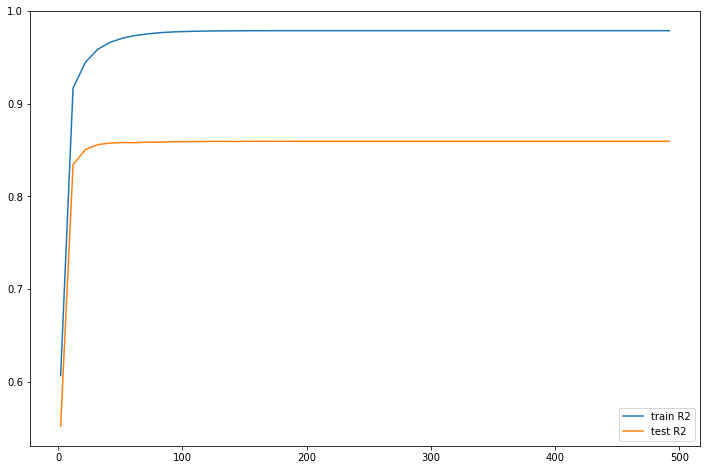

In [22]:
# zakres parametru
max_leaf_nodes = list(range(2, 500, 10))
train_r2 = []
test_r2 = []

for param in max_leaf_nodes:
    model = RandomForestRegressor(n_estimators=80, max_leaf_nodes=param, random_state=0).fit(train_x, train_y)
    train_r2.append(model.score(train_x, train_y))
    test_r2.append(model.score(test_x, test_y))
    
plt.figure(figsize = (12, 8))
plt.plot(max_leaf_nodes, train_r2, label = 'train R2')
plt.plot(max_leaf_nodes, test_r2, label = 'test R2')
plt.legend()
plt.show()  

max_leaf_nodes dla których znajduje sie 'sweet spot' znajduje się w okolicy 20-30

* Dobierz wybrane parametry korzystając z dowolnej metody optymalizacji hiperparametrów.

Ustal zakresy dla zmiennych:

`n_estimators`

`max_leaf_nodes`

`min_samples_split`

`min_samples_leaf`

Użyj 5-krotnej crosswalidacji.

Użyj domyślnej wartości parametru `scoring`.

In [24]:
from sklearn.model_selection import GridSearchCV

params = {"min_samples_split": range(2, 21, 2),
          "min_samples_leaf": range(1, 21, 2)}

forest = RandomForestRegressor(n_estimators=80, max_leaf_nodes=50)

rf_regressor_search = GridSearchCV(forest, params, cv=5)

rf_regressor_search.fit(train_x, train_y)
rf_regressor_search.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 10}

* Wytrenuj na zbiorze treningowym model RandomForrestRegressor z najlepszymi wybranymi parametrami. Sprawdź wynik na zbiorze testowym.

In [25]:
best_rf_regressor = \
    RandomForestRegressor(n_estimators=80, max_leaf_nodes=50,
                          min_samples_leaf=rf_regressor_search.best_params_["min_samples_leaf"],
                          min_samples_split=rf_regressor_search.best_params_["min_samples_split"])
best_rf_regressor.fit(train_x, train_y), best_rf_regressor.score(test_x, test_y)

(RandomForestRegressor(max_leaf_nodes=50, min_samples_split=10, n_estimators=80),
 0.8465291091367286)

#### Zadanie z *

Spróbuj rozwiązać powyższy problem za pomocą innych znanych modeli. Porównaj wyniki - który model działa najlepiej?

In [ ]:
###########################
### miejsce na Twoj kod ###
###########################